In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [2]:
transform = transforms.ToTensor()#将img格式图片转换成数字格式
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root=".\\data", train=True,transform=transform,download=False),batch_size=64,shuffle=True)
# Test dataset
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root=".\\data", train=False,transform=transform),
                                                batch_size=64,shuffle=True)

In [3]:
#查看数据样例
dataiter = iter(train_loader)
imgs, labels = next(dataiter)
print(imgs.size())
print(labels)

torch.Size([64, 1, 28, 28])
tensor([2, 3, 7, 7, 4, 3, 6, 6, 3, 8, 4, 6, 1, 5, 4, 9, 9, 1, 0, 6, 3, 1, 9, 7,
        3, 4, 6, 3, 5, 8, 4, 0, 1, 7, 4, 6, 6, 1, 8, 2, 8, 9, 6, 9, 5, 8, 4, 3,
        2, 3, 1, 6, 9, 1, 6, 7, 7, 9, 0, 1, 2, 4, 0, 7])


In [4]:
#检查GPU是否可用
if torch.cuda.is_available():
    gpu_available=True
else:
    gpu_available=False

https://ieeexplore.ieee.org/document/726791


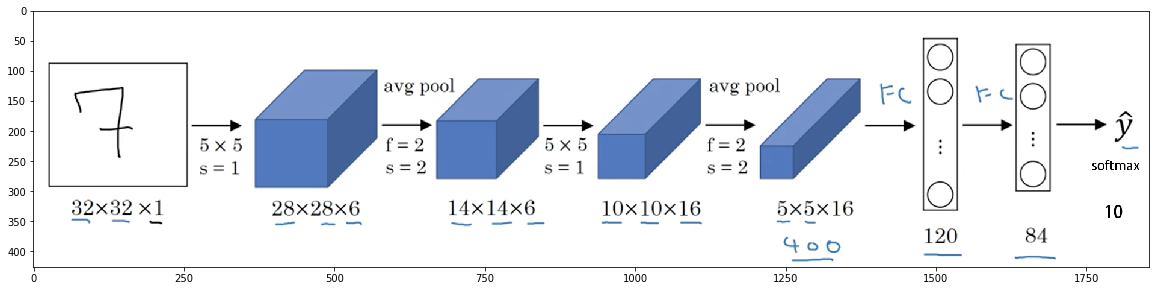

In [5]:
#原始论文与网络结构地址
import matplotlib.image as Img
paper_url = "https://ieeexplore.ieee.org/document/726791"

print(paper_url)

img_url = ".\\data\\LeNet-5.png"
image = Img.imread(img_url)
plt.figure(figsize=(20,10))
plt.imshow(image)
# plt.show()

In [6]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5,padding=2)
        self.maxpool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

# Spatial transformer localization-network

    def forward(self, x):
#         print(x.size())
        # transform the input
        x = F.relu(self.maxpool(self.conv1(x))) #relu和maxpool的顺序貌似不影响准确率
        # Perform the usual forward pass
        x = F.relu(self.maxpool(self.conv2(x)))
#         print(x.size())
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = LeNet()
if gpu_available:
    model.cuda()

In [7]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters()) 
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #这个优化参数配置只能达到97-99%准确率
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if gpu_available:
            data,target = Variable(data).cuda(),Variable(target).cuda()  
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [8]:
def test():
    with torch.no_grad():
        model.eval()
        test_loss = 0
        correct = 0
        idx = 0
        for batch_id,(data,target) in enumerate(test_loader):
            if gpu_available:
                data,target = Variable(data).cuda(),Variable(target).cuda()  
            output = model(data)
            test_loss += criteria(output, target).item()
            # get the index of the max log-probability
            pred = output.max(1, keepdim=True)[1]

            correct += pred.eq(target.view_as(pred)).sum().item()
        test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'
              .format(test_loss, correct, len(test_loader.dataset),
                      100. * correct / len(test_loader.dataset)))

In [9]:
import time
for epoch in range(1, 5):
    start_time = time.time()
    train(epoch)
    test()
    end_time = time.time()
    print("flow one epoch with "+str(int(end_time-start_time))+" seconds")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.321318
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.351549
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.209493
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.083422
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.186233

Test set: Average loss: 0.0013, Accuracy: 9728/10000 (97%)

flow one epoch with 18 seconds
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.124900
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.071590
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.032542
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.024442
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.075505

Test set: Average loss: 0.0009, Accuracy: 9812/10000 (98%)

flow one epoch with 18 seconds
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.030913
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.012041
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.033468
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.009057
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.123934

Test set: Average loss: 0.0008, Accuracy: 9835/10000 (98%)

flow one epoch with 